In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

%matplotlib inline

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmissi

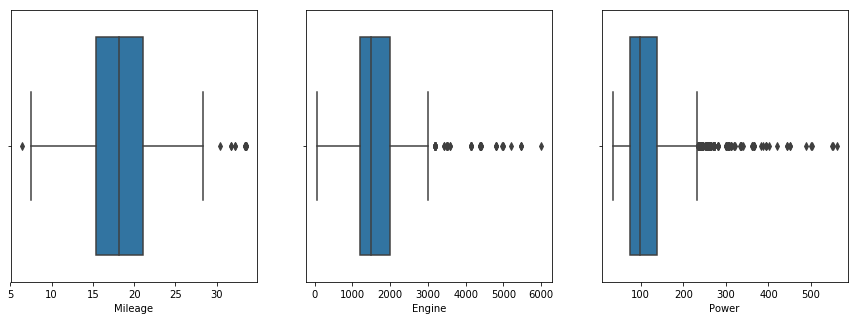

In [2]:
data = pd.read_excel('Data_Train (1).xlsx')

data.head()

data.columns

data.describe()

data.info()

data.isnull().sum()

# Removing units

data['Power'] = data['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
data.loc[data.Power == 'null','Power'] = np.NaN

data['Mileage'] = data['Mileage'].apply(lambda x: re.sub('[$kmpl|km/kg]','',str(x)))
data['Engine'] = data['Engine'].apply(lambda x: re.sub('[$CC]','',str(x)))
data['Power'] = data['Power'].apply(lambda x: re.sub('[$bhp]','',str(x)))

data.head()

data['Mileage'] = pd.to_numeric(data['Mileage'],errors='coerce')
data['Engine'] = pd.to_numeric(data['Engine'],errors='coerce')
data['Power'] = pd.to_numeric(data['Power'],errors='coerce')

# Removing Outlayers


data.drop(data[data['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)


(data['Mileage']==0).sum(),(data['Engine']==0).sum(),(data['Power']==0).sum(),(data['Seats']==0).sum()

mileage_median = data['Mileage'].median()
engine_median = data['Engine'].median()
power_midean = data['Power'].median()
seats_mode = data['Seats'].mode()
data['Mileage'].median(),data['Engine'].median(),data['Power'].median(),data['Seats'].mode()

seats_mode = 5
data['Mileage'].replace(0,mileage_median,inplace = True)
data['Seats'].replace(0,seats_mode,inplace = True)
data['Mileage'].median(),data['Engine'].median(),data['Power'].median(),data['Seats'].mode()
        

(data['Mileage']==0).sum(),(data['Engine']==0).sum(),(data['Power']==0).sum(),(data['Seats']==0).sum()

data

data.isnull().sum()

data = pd.read_excel('Data_Train (1).xlsx')

data.head()

data.columns

data.describe()

data.info()

data.isnull().sum()

# Removing units

data['Power'] = data['Power'].str.split(' ').str[0]
# including nan rows there is data in this column of 'null' value
data.loc[data.Power == 'null','Power'] = np.NaN

data['Mileage'] = data['Mileage'].apply(lambda x: re.sub('[$kmpl|km/kg]','',str(x)))
data['Engine'] = data['Engine'].apply(lambda x: re.sub('[$CC]','',str(x)))
data['Power'] = data['Power'].apply(lambda x: re.sub('[$bhp]','',str(x)))

data.head()

data['Mileage'] = pd.to_numeric(data['Mileage'],errors='coerce')
data['Engine'] = pd.to_numeric(data['Engine'],errors='coerce')
data['Power'] = pd.to_numeric(data['Power'],errors='coerce')

# Removing Outlayers


data.drop(data[data['Kilometers_Driven'] >= 6500000].index, axis=0, inplace=True)


(data['Mileage']==0).sum(),(data['Engine']==0).sum(),(data['Power']==0).sum(),(data['Seats']==0).sum()

mileage_median = data['Mileage'].median()
engine_median = data['Engine'].median()
power_midean = data['Power'].median()
seats_mode = data['Seats'].mode()
data['Mileage'].median(),data['Engine'].median(),data['Power'].median(),data['Seats'].mode()

seats_mode = 5
data['Mileage'].replace(0,mileage_median,inplace = True)
data['Seats'].replace(0,seats_mode,inplace = True)
data['Mileage'].median(),data['Engine'].median(),data['Power'].median(),data['Seats'].mode()
        

(data['Mileage']==0).sum(),(data['Engine']==0).sum(),(data['Power']==0).sum(),(data['Seats']==0).sum()

# Filling Null Values

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(data['Mileage'])

plt.subplot(1,3,2)
sns.boxplot(data['Engine'])

plt.subplot(1,3,3)
sns.boxplot(data['Power'])
plt.show()

data['Mileage'].fillna(data['Mileage'].median(),inplace=True)
data['Engine'].fillna(data['Engine'].median(),inplace=True)
data['Power'].fillna(data['Power'].median(),inplace=True)
data['Seats'].fillna(data['Seats'].median(),inplace=True)

data.isnull().sum()

CarName = data.Name.str.split(' ').apply(lambda x: x[0])
CarBodyStyle = data.Name.str.split(' ').apply(lambda x: x[1])
CarTrimLevel = data.Name.str.split(' ').apply(lambda x: x[2:])

In [3]:
CarName = pd.Series(CarName,name="CarName")
BodyStyle = pd.Series(CarBodyStyle,name="BodyStyle")
data=pd.concat([data,CarName,BodyStyle],axis=1)
data.drop('Name',axis=1,inplace=True)
data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,CarName,BodyStyle
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4


In [4]:
data['Year'] = data['Year'].astype(float)
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype(float)

In [5]:
data.dtypes

Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
CarName               object
BodyStyle             object
dtype: object

In [6]:
data.loc[data.CarName == 'ISUZU','CarName']='Isuzu'

In [7]:
data.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'CarName',
       'BodyStyle'],
      dtype='object')

In [8]:
data= pd.get_dummies(data,dtype = np.float64)

data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,BodyStyle_Xcent,BodyStyle_Xenon,BodyStyle_Xylo,BodyStyle_Yeti,BodyStyle_Z4,BodyStyle_Zen,BodyStyle_Zest,BodyStyle_i10,BodyStyle_i20,BodyStyle_redi-GO
0,2010.0,72000.0,26.60,998.0,58.16,5.0,1.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015.0,41000.0,19.67,1582.0,126.20,5.0,12.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,46000.0,18.20,1199.0,88.70,5.0,4.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,87000.0,20.77,1248.0,88.76,7.0,6.00,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,40670.0,15.20,1968.0,140.80,5.0,17.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data.dropna(inplace=True)

In [10]:
X = data.drop(['Price'], axis = 1)
y = data.iloc[:, 6].values
y

array([ 1.75, 12.5 ,  4.5 , ...,  2.9 ,  2.65,  2.5 ])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

r2_score(y_test,y_pred),mean_absolute_error(y_test,y_pred),mean_squared_error(y_test,y_pred)
#Without TrimLevel (0.8119612142304287, 2.5652491900055177, 25.8311362535715

(0.8119612142304287, 2.5652491900055177, 25.8311362535715)

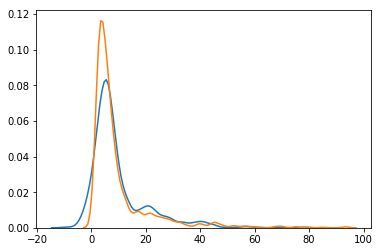

In [13]:
sns.kdeplot(y_pred)
sns.kdeplot(y_test)

In [14]:
rfr = RandomForestRegressor(n_estimators = 500,random_state=0)

rfr.fit(X_train,y_train)

pred = rfr.predict(X_test)
#Best for random state 6

r2_score(y_test,pred),mean_absolute_error(y_test,pred),mean_squared_error(y_test,pred)

#Without TrimLevel (0.8874549564774823, 1.4738172402903018, 15.4604612128097)

(0.8874549564774823, 1.4738172402903018, 15.4604612128097)

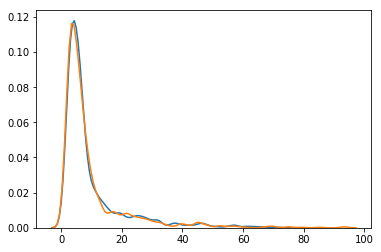

In [15]:
sns.kdeplot(pred)
sns.kdeplot(y_test)

In [30]:
from sklearn.ensemble import AdaBoostRegressor

for i in [11,12,13,14,15]:
    ada = AdaBoostRegressor(base_estimator = RandomForestRegressor(n_estimators = 150,random_state=i))

    ada.fit(X_train,y_train)

    pred_3 = ada.predict(X_test)

    print(r2_score(y_test,pred_3),mean_absolute_error(y_test,pred_3),mean_squared_error(y_test,pred_3))

#Without TrimLevel (0.8945998415655947, 1.3900536850829128 , 14.478958915441602)
#For random_state 8 = 0.8982582531398402 1.3824229104892893 13.97639808758247

0.8904448620077084 1.4090902489053032 15.049733942792002
0.8954191294179764 1.3939486248017396 14.366412261520408
0.8910267570210055 1.4028009305621478 14.969798256586447
0.8881344334690933 1.4053871804123346 15.367120561413556
0.8942134554124471 1.3962914316250072 14.532037291413877


In [250]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(objective='reg:squarederror')

xgbr.fit(X_train,y_train)

y_pred_xgb = xgbr.predict(X_test)

r2_score(y_test,y_pred_xgb),mean_absolute_error(y_test,y_pred_xgb),mean_squared_error(y_test,y_pred_xgb)
# Without TrimLevel (0.8885108274551354, 1.3747020556186125, 15.315414822628394)

(0.8885108274551354, 1.3747020556186125, 15.315414822628394)

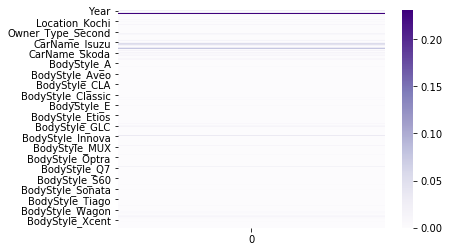

In [251]:
feat_imp = pd.DataFrame(xgbr.feature_importances_, index=X_train.columns)
sns.heatmap(feat_imp, cmap='Purples')

In [252]:
from sklearn.tree import DecisionTreeRegressor

des = DecisionTreeRegressor(random_state=101)

des.fit(X_train,y_train)

y_pred_4 = des.predict(X_test)

r2_score(y_test,pred_4),mean_absolute_error(y_test,pred_4),mean_squared_error(y_test,y_pred_4)

# Without TrimLevel (0.8182205478633929, 2.016957364341085, 27.419284198504982)

(0.8182205478633929, 2.016957364341085, 27.419284198504982)

In [253]:
from lightgbm import LGBMRegressor

base_lgbmr = LGBMRegressor()

base_lgbmr.fit(X_train, y_train)


y_pred_lgb = base_lgbmr.predict(X_test)

r2_score(y_test,y_pred_lgb),mean_absolute_error(y_test,y_pred_lgb),mean_squared_error(y_test,y_pred_lgb)

(0.8785047568280564, 1.5371360740777535, 16.689961954876278)